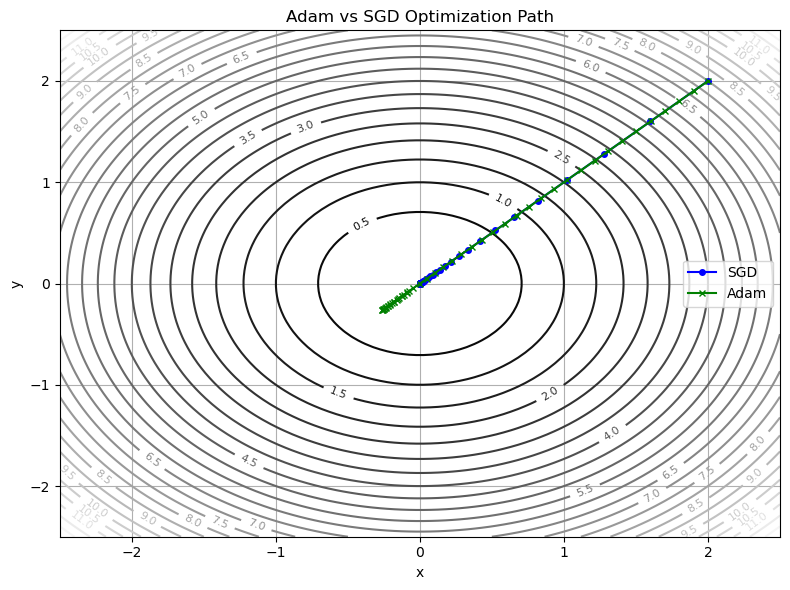

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Loss function: f(x, y) = x² + y²
def loss(x, y):
    return x**2 + y**2

# Gradient: ∇f = [2x, 2y]
def grad(x, y):
    return 2*x, 2*y

# Settings
np.random.seed(0)
epochs = 50
start_point = np.array([2.0, 2.0])

# SGD optimizer
lr_sgd = 0.1
path_sgd = [start_point.copy()]
x, y = start_point.copy()
for _ in range(epochs):
    dx, dy = grad(x, y)
    x -= lr_sgd * dx
    y -= lr_sgd * dy
    path_sgd.append([x, y])

# Adam optimizer
lr_adam = 0.1
beta1, beta2, eps = 0.9, 0.999, 1e-8
m, v = np.zeros(2), np.zeros(2)
x, y = start_point.copy()
path_adam = [start_point.copy()]

for t in range(1, epochs + 1):
    dx, dy = grad(x, y)
    g = np.array([dx, dy])
    m = beta1 * m + (1 - beta1) * g
    v = beta2 * v + (1 - beta2) * (g**2)
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    update = lr_adam * m_hat / (np.sqrt(v_hat) + eps)
    x -= update[0]
    y -= update[1]
    path_adam.append([x, y])

path_sgd = np.array(path_sgd)
path_adam = np.array(path_adam)

# Contour Plot of the Loss Surface
xgrid = np.linspace(-2.5, 2.5, 100)
ygrid = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(xgrid, ygrid)
Z = loss(X, Y)

plt.figure(figsize=(8, 6))
cp = plt.contour(X, Y, Z, levels=30, cmap='gray')
plt.clabel(cp, inline=True, fontsize=8)

# Plot paths
plt.plot(path_sgd[:, 0], path_sgd[:, 1], marker='o', color='blue', label='SGD', markersize=4)
plt.plot(path_adam[:, 0], path_adam[:, 1], marker='x', color='green', label='Adam', markersize=4)
plt.title("Adam vs SGD Optimization Path")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
